In [15]:
load('../../F21-ETALA/etala_utilities.sage')

# SMP exam spring 2020

## Problem 1:   Probability theory


Firstly the given information is formalized a bit in order to aid the solution of the following problems.  
The event that the chip-set has an error will be denoted E, while the event of the test indicating one will be denoted I.  
The information given can then be formulated:  
$$P\left(I | E\right) = 0.34$$  
$$P\left(I |  \bar E\right) = 0.08$$  
$$P\left(E\right) = 0.025$$

### a)

The probability of the chip-set being faulty and the test indicating error ($P\left(I \cap E\right)$), can be found easily by the multiplication rule  
$P(A \cap B) = P(A|B)P(B)$  
substituting with the values of our case  
$P(I \cap E)=P(I|E)P(E) = 0.34\cdot0.025 = 0.0085$

### b)

From the rule of complimentary probability, the probability of a chip not being faulty is:  
$P\left(\bar E\right)=1-P(E) = 1 - 0.025 = 0.975$  

### c)

The total probability of the test indicating an error can be found by the rule of total probability as  
$P(I) = P\left(I|E\right)P\left(E\right) + P \left(I|\bar E\right)P\left(\bar E\right) = P(I \cap E) + P \left(I|\bar E\right)P\left(\bar E\right) = 0.0085 + 0.08 \cdot 0.975 = 0.0865$

### d)

The probability of the chip-set being faulty in the case where the test indicates it is, can be found by the formula of conditional probability:  
$P(E | I) = \frac{P(I \cap E)}{P(I)} = \frac{0.0085}{0.0865} = 0.0983$

## Problem 2:  Stochastic Variables

### a)

In order to find a valid value for K, it is useful to consider that the total probability being 1, the sum of each row and cell in the column must be 1. 
Using this, one can construct the equation:  
$\begin{align}  && 6 \cdot \frac K 2 + 4\cdot\frac K 4 & = 1 \\
\Leftrightarrow &&           3K + K & = 1 \\
\Leftrightarrow &&                    4K & = 1 \\
\Leftrightarrow &&                     K & = \frac 1 4
\end{align}$

### b)

In order to construct the pmf for X, each of the columns of the table are summed in order to form the probability of each value of X:

\text{f_X_table} = \left[\frac{3}{16}, \frac{3}{16}, \frac{1}{4}, \frac{3}{16}, \frac{3}{16}\right]

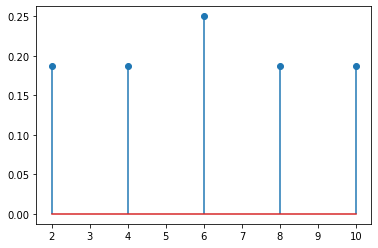

In [18]:
import matplotlib.pyplot as plt
f_XY_table = [[1/8, 1/16, 1/8, 1/8, 1/16], 
              [1/16, 1/8, 1/8, 1/16, 1/8]]
f_X_table = [f_XY[0][i]+f_XY[1][i] for i in range(len(f_XY[0]))]; show_var()
X_table = [2*i for i in range(1, 6)]
def f_X(x):
    if x not in X_table:
        return 0
    else:
        return f_X_table[x/2-1]

plt.stem(X_table, f_X_table)
plt.show()

### c)

In order to find the cdf, the found pmf is summed:

\text{F_X_table} = \left[\frac{3}{16}, \frac{3}{8}, \frac{5}{8}, \frac{13}{16}, 1\right]

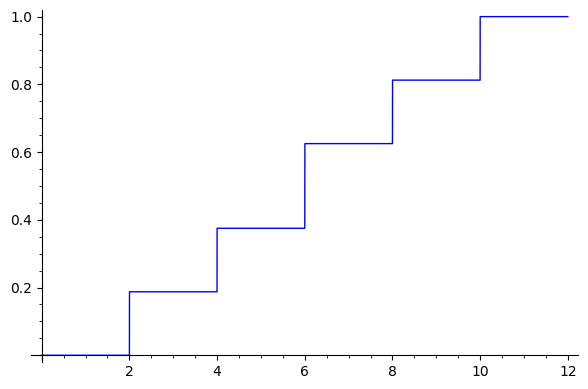

In [31]:
F_X_table = [sum(f_X_table[:i+1]) for i in range(len(f_X_table))]; show_var()
def F_X(x):
    if x < X[0]:
        return 0
    elif x > X[-1]:
        return 1
    else:
        return F_X_table[floor(x/2)-1]
plot(F_X, xmin=0, xmax=12)

### d)

The mean of X is calculated as  
$EX = \sum_x x f(x)$

In [33]:
X_mean = sum([x*f_X(x) for x in X_table]); show_var()

\text{X_mean} = 6

And the variance is 
$Var(X) = E\left[(X-EX)^2\right] = E\left(X^2\right) - EX^2$

In [42]:
X_var = sum([x^2*f_X(x) for x in X_table]) - X_mean^2; show_var()

\text{X_var} = \frac{15}{2} = 7.5

### e)

#### This answer is wrong
In order to find the expectation of X given Y, the formula  
$\sum_{x_i} x_i f_{X|Y}(x_i|y_i)$  
is used. This yields a function of Y.

In [45]:
mean_XY = [sum([x*f_XY_table[i][X_table.index(x)] for x in X_table]) for i in range(len(f_XY_table))]; show_var(approx=False)

\text{mean_XY} = \left[\frac{23}{8}, \frac{25}{8}\right]

### f)

#### This answer is wrong.
The answer given below is $P(X=6 \cap Y = 1)$ not P(X=6 | Y = 1)  
This probability can be read directly from the joint pmf, as the entry in the Y = 1 row and X = 6 column:  
__The probability of Y = 1 given X = 6 is 1/8__.

## Problem 3:  Stochastic processes

### a)

In order to plot the three realizations, a function to create a realization based on the scipy.stats.norm distribution class is implemented, called three times, and the resulting samples are plotted using matplotlib

<IPython.core.display.Javascript object>


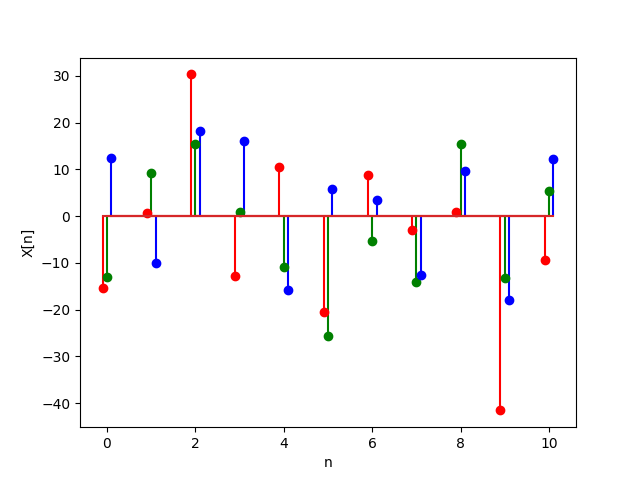

In [88]:
%matplotlib notebook
from scipy.stats import norm
import matplotlib.pyplot as plt

def realization_of_X(n):
    sample_len = len(n)
    Z = norm.rvs(1, 10, sample_len)
    return [-1.5*(Z[i] + 1) for i in range(sample_len)]

num_realizations = 3
_n = range(11)
realizations = [realization_of_X(_n) for _ in range(num_realizations)]

offset = 0.1
fmt = ['r', 'g', 'b']
fig, ax = plt.subplots()
for i in range(num_realizations):
    ax.stem([-offset + i*offset + n for n in _n], realizations[i], fmt[i], fmt[i]+'o')
    ax.set_xlabel('n')
    ax.set_ylabel('X[n]')
fig.show()

### b)

Finding the temporal mean is done by averaging the samples of the realization

In [89]:
temp_mean_realization1 = sum(realizations[0])/len(realizations[0]); show_var()

\text{temp_mean_realization1} = -4.639597025759584 \sim -4.64

### c)

The ensemble mean is calculated using the definition of X and the algebraic rules for expectation and variance.  
The mean and variance of Z is given directly as 1 and 10 respectively.  
$E\left(X[n]\right) = -1.5(E\left(Z[n]\right)+1) = -1.5(1 + 1) = -3$  
Similarly for the variance:  
$Var\left(X[n]\right) = Var\left(-1.5(Z[n]+1)\right) = 2.25 \cdot Var\left(Z[n]\right) = 22.5$  


### d)

Since neither the mean nor the variance depends on $n$, __the process is WSS__.

## Problem 4:  Statistics

### a)

The general linear model is  
$y_i = \alpha + \beta x_i + \epsilon_i$, where $\epsilon_i \sim \mathcal N\left(0, \sigma^2\right)$  
where y is height and x is age

### b)

In order to find the parameters that best fit the data, the following equation is used:  
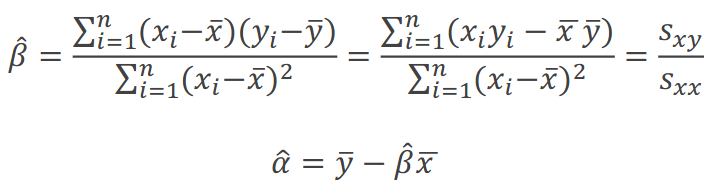

where $s_{xy}$ is the covariance of x and y, while $s_{xx}$ is the variance of x

In [68]:
height = [55, 60, 70, 75, 79, 90, 101, 112, 121, 129, 134, 143]
age    = [ 1,  3,  6,  9, 12, 24,  36,  48,  60,  72,  84,  96]

n_ = len(age)
ex = mean(age)
ey = mean(height)

s_xy = sum([age[i]*height[i] - ex*ey for i in range(n_)])
s_xx = sum([(age[i]-ex)^2 for i in range(n_)])
beta = s_xy/s_xx; show_var()
alpha = ey - beta*ex; show_var()

\text{beta} = \frac{26513}{30127} = 0.88006591796875

\text{alpha} = \frac{1938425}{30127} = 64.34375

In order to verify the calculated parameters, the line is plotted along with the raw data:

<IPython.core.display.Javascript object>


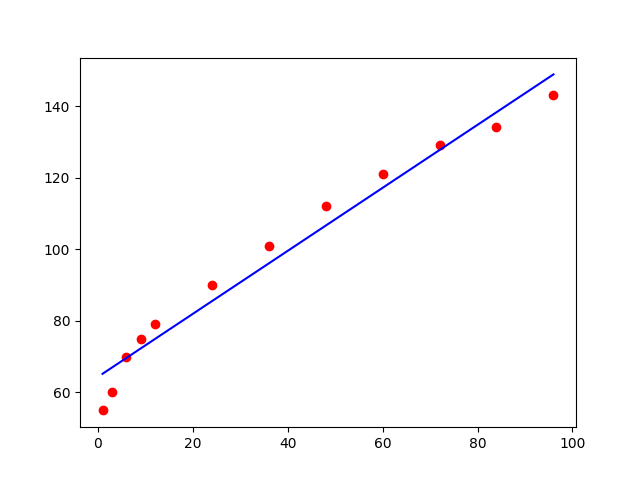

In [79]:
import matplotlib.pyplot as plt
%matplotlib notebook

fig, ax = plt.subplots()
ax.plot(age, height, 'or')
ax.plot(age, [alpha + beta*x for x in age], 'b-')
fig.show()

### c)

The null hypothesis for testing if there is a linear relation between x and y is  
$H_0\text{:}\quad beta = 0$  
$H_1\text{:}\quad beta \ne 0$  

### d)

Using the test statistic  
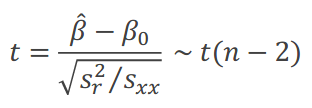

The p value is calculated as:  
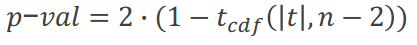

Where $s_r^2$ is the empirical variance, $s_xx$ is the variance of the age data, and t is the student t distribution.

In [72]:
import scipy.stats
# in this case the residuals can be used to calculate the empirical variance and are saved for convenience.
residuals = [height[i]-(alpha + beta*age[i]) for i in range(n_)]
sr2 = 1/(n_-2) * sum([r^2 for r in residuals])
t = beta/sqrt(sr2/s_xx); show_var()
p_val = 2*(1-scipy.stats.t.cdf(float(abs(t)), n_-2)); show_var()𝑡𝑖𝑛𝑣(0.975,𝑛−2

\text{t} = \frac{132565}{5802978} \, \sqrt{\frac{2901489}{5}} \sim 17.4

\text{p_val} = \text{\texttt{8.325043543422339e{-}09}} \sim 8.32 \times 10^{-9}

Since the p-value is much lower than 0.05, __the null hypothesis can be rejected__, and there is indication that there is a linear relation in the data.

### e)

The 95% confidence interval for a linear relation is given by 
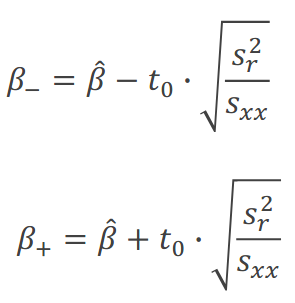

In [76]:
conf_range = 2*scipy.stats.t.ppf(1-0.05/2, n_-2) * sqrt(sr2/s_xx)
beta_minus = beta - conf_range/2; show_var()
beta_plus = beta + conf_range/2; show_var()

\text{beta_minus} = -0.00014791641065920526 \, \sqrt{\frac{2901489}{5}} + \frac{26513}{30127} \sim 0.767

\text{beta_plus} = 0.00014791641065920526 \, \sqrt{\frac{2901489}{5}} + \frac{26513}{30127} \sim 0.993

The 95% confidence interval here indicates the bounds within which there's a 95% chance the slope of the linear relation in the data will lie. If zero is in this interval, the null hypothesis cannot be rejected with a 5% significance. If zero is not in the interval it can.

### f)

The residual plot has the X variable on the first axis, and the residual for that same value of X on the second.

<IPython.core.display.Javascript object>


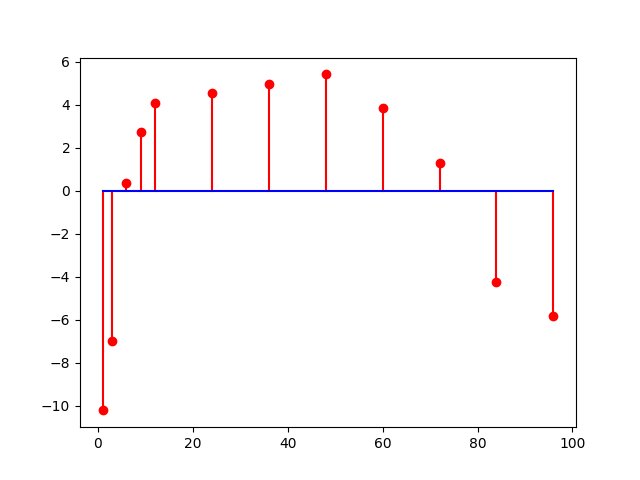

In [82]:
fig, ax = plt.subplots()
ax.plot(age, residuals, 'ro')
for x, r in zip(age, residuals):
    ax.plot([x]*2, [0, r], 'r-')
ax.plot(age, [0]*n_, 'b-')
fig.show()

If the linear model was a good fit, the residual plot should show idd gaussian noise with an average of zero (as per the model stated in a). In this case, it would seem the noise has an age dependent character, and a more complex model might be better for the age, height relationship. 
Given the calculations above, there's a good indication the model will have a linear component however.